In [ ]:
pip install fbprophet

In [3]:
pip install plotly

  Using cached https://files.pythonhosted.org/packages/70/56/eabdc7b7187cdb9d6121f6de2831ad5b85f7d002fa4bfe0476dbdb554bf6/plotly-4.8.1-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [ ]:
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
recovered_cases_url ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
death_cases_url ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"


def get_n_melt_data(data_url,case_type):
    df = pd.read_csv(data_url)
    melted_df = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
    melted_df.rename(columns={"variable":"Date","value":case_type},inplace=True)
    return melted_df

def merge_data(confirm_df,recovered_df,deaths_df):
    new_df = confirm_df.join(recovered_df['Recovered']).join(deaths_df['Deaths'])
    return new_df

# Load EDA pkg
import pandas as pd

confirm_df = get_n_melt_data(confirmed_cases_url,"Confirmed")
recovered_df = get_n_melt_data(recovered_cases_url,"Recovered")
deaths_df = get_n_melt_data(death_cases_url,"Deaths")

df = merge_data(confirm_df,recovered_df,deaths_df)

df_per_day = df.groupby("Date")[['Confirmed','Recovered', 'Deaths']].sum()


global_cases = df_per_day.reset_index()

confirmed_cases = global_cases[["Date","Confirmed"]]
recovered_cases = global_cases[["Date","Recovered"]]
confirmed_cases.rename(columns={"Date":"ds","Confirmed":"y"},inplace=True)

train = confirmed_cases[:40]
test = confirmed_cases[40:]

# Model Initialize
from fbprophet import Prophet
m = Prophet()

m.add_seasonality(name="monthly",period=30.5,fourier_order=5)
# Fit Model
m.fit(train)

# Future Date
future_dates = m.make_future_dataframe(periods=15)

# Prediction
prediction =  m.predict(future_dates)


# Plot Prediction
m.plot(prediction)


m.plot_components(prediction)

test['dates'] = pd.to_datetime(test['ds'])

test = test.set_index("dates")

test = test['y']

import matplotlib.pyplot as plt

test.plot()

# Find Point/Dates For Change
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(prediction)
c = add_changepoints_to_plot(fig.gca(),m,prediction)

In [4]:
# importing the required libraries
import pandas as pd
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12
# Disable warnings
import warnings
warnings.filterwarnings('ignore')
# Reading the datasets
df= pd.read_excel('/content/Covid cases in India.xlsx')
df_india = df.copy()
print(df)

# Coordinates of India States and Union Territories
India_coord = pd.read_excel('/content/Indian Coordinates.xlsx')
#Day by day data of India, Korea, Italy and Wuhan
dbd_India = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")

df.drop(['S. No.'],axis=1,inplace=True)
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
total_cases = df['Total cases'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020):', total_cases)
df.style.background_gradient(cmap='Reds')
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')
"""
df_full&nbsp;=&nbsp;pd.merge(India_coord,df,on='Name&nbsp;of&nbsp;State&nbsp;/&nbsp;UT')
map&nbsp;=&nbsp;folium.Map(location=[20,&nbsp;70],&nbsp;zoom_start=4,tiles='Stamenterrain')
for&nbsp;lat,&nbsp;lon,&nbsp;value,&nbsp;name&nbsp;inzip(df_full['Latitude'],&nbsp;df_full['Longitude'],&nbsp;df_full['Total&nbsp;cases'],&nbsp;df_full['Name&nbsp;of&nbsp;State&nbsp;/&nbsp;UT']):
&nbsp;&nbsp;&nbsp;&nbsp;folium.CircleMarker([lat,&nbsp;lon],&nbsp;radius=value*0.8,&nbsp;popup&nbsp;=&nbsp;('<strong>State</strong>:&nbsp;'&nbsp;+&nbsp;str(name).capitalize()&nbsp;+&nbsp;'
''<strong>Total&nbsp;Cases</strong>:&nbsp;'&nbsp;+&nbsp;str(value)&nbsp;+&nbsp;'
'),color='red',fill_color='red',fill_opacity=0.3&nbsp;).add_to(map)
map
"""

ModuleNotFoundError: No module named 'folium'

NameError: name 'df_full' is not defined

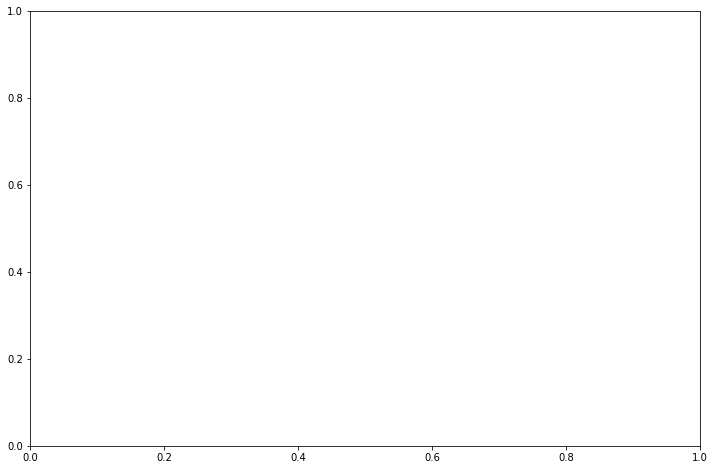

In [5]:
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="r")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="g")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = dbd_India['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)
'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()


# import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India","Wuhan"))
fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)
fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)
fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),2, 1)
# fig.add_trace(go.Bar(x=dbd_Wuhan['Date'], y=dbd_Wuhan['Total Cases'],
#                     marker=dict(color=dbd_Wuhan['Total Cases'], coloraxis="coloraxis")),2, 2)
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()


In [ ]:
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import pandas as pd

from sklearn.externals import joblib

import pickle
import uuid

descriptor = ("d", "r", "c")
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
recovered_cases_url ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
death_cases_url ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

filenames = [death_cases_url,
             recovered_cases_url,
             confirmed_cases_url]

params_dict = [{'hidden_layer_sizes':  [(4,4,4,4),(4,4),(4,4,3,3),(4,3,4),(10,10,10,10,10), (3,), (6,6,6,6), (4,4), (10,5,5,10), (6,), (12,12,12), (3,3,3), (6,6,6), (3,3,3,3,3), (12, 12, 6, 6, 3, 3)],
                'activation': ['relu','identity','logistic','tanh'],
                'solver': ['adam', 'lbfgs'],
                'learning_rate':['constant','adaptive','invscaling'],
                'learning_rate_init': [0.1,0.01,0.5, 0.00001],
                'alpha': [0.01,0.1,0.001, 0.0001],
                'max_iter': [10000]}]

print(zip(descriptor, filenames))

for descriptor_, fname in zip(descriptor, filenames):
    print("Working on:", fname)
    df = pd.read_csv(fname)
    #print(df)
    df.drop(columns=["Province/State","Country/Region"], inplace=True)
    
    #print(df)
    
    DATA = np.array((0,0,0,0))
    
    for i, j in df.iterrows():
        #print(i, j)
        latitude = j['Lat']
        longitude = j['Long']
        
        for k,l in j.iteritems():
            if k=='Lat':
                continue
            if k=='Long':
                continue
            date = datetime.strptime(k, '%m/%d/%y')
            day = date - date.strptime("01/22/20", '%m/%d/%y')
            days = day.days
            #print(days)
            temp = np.array([j["Lat"], j['Long'], days, l])
            #print(temp)
            DATA = np.vstack((DATA,temp))  
            
    DATA = np.delete(DATA, 0,0)
    np.random.shuffle(DATA)
    
    input_data = DATA[:,:-1]
    output_data = DATA[:, -1]
    
    input_train, input_test, output_train, output_test = train_test_split(input_data, output_data)
    
    
    train_start_time=datetime.now()
    clf = GridSearchCV(MLPRegressor(), params_dict, cv=3, n_jobs=-1, scoring='r2', verbose=10)
    clf.fit(input_train, output_train)
    train_end_time = datetime.now()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    
    uuid_=uuid.uuid4()
    file = open(descriptor_+"-"+str(uuid_)+"-results.txt", 'w')
    file.write("Data for: "+fname+"\n")
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
          
          file.write("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params)+"\n")
    file.write("Total training time:"+str(train_end_time-train_start_time)+"\n")
    file.close()
    model_name = descriptor_+"-"+str(uuid_)+".pickle"
    joblib.dump(clf.best_estimator_, model_name)




















In [ ]:
clf.predict(test)

In [ ]:
clf.predict(output_train)

In [ ]:
ARIMA 2---> famous model in time series--  stats